# IFT 6758 - Assignment 2

In [1]:
%load_ext autoreload
%autoreload 2

## Question 1

### a)
Begin by using the functions created in `q1.py` to make the data more informative and readable. Specifically, complete the following cells:


In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from q1 import count_labels, convert_id, convert_ids, contains_label, get_conditional_proportion

sns.set(style="ticks")

In [3]:
# Load the `audio_segments.csv` into a DataFrame `df`

# TODO
audio_segments = pd.read_csv('data/audio_segments.csv')
audio_segments.head()

,# YTID,start_seconds,end_seconds,positive_labels
0,--4gqARaEJE,0.0,10.0,"/m/068hy,/m/07q6cd_,/m/0bt9lr,/m/0jbk"
1,--BfvyPmVMo,20.0,30.0,/m/03l9g
2,--U7joUcTCo,0.0,10.0,/m/01b_21
3,--i-y1v8Hy8,0.0,9.0,"/m/04rlf,/m/09x0r,/t/dd00004,/t/dd00005"
4,-0BIyqJj9ZU,30.0,40.0,"/m/07rgt08,/m/07sq110,/t/dd00001"


In [9]:
audio_segments.columns

Index(['# YTID', ' start_seconds', ' end_seconds', ' positive_labels'], dtype='object')

In [4]:
# Add a column corresponding to the count of labels called `label_count`
# Here, there is an annoying issue with accessing the positive_labels column

# TODO
audio_segments['label_count'] = audio_segments[' positive_labels'].apply(count_labels)

In [5]:
# Add a new column called `label_names` with the processed human readable label names instead of label IDS

# Print the time taken for this operation (either using the time module or timeit). 
# Since we are only executing this code once it is relatively fine that it takes a couple of minutes. 
# However, for a larger dataset, it would be worth the time to speed it up 
# (for example by creating a ID -> name dictionary once and using that).

# TODO
start_time = time.time()
audio_segments['label_names'] = audio_segments[' positive_labels'].apply(convert_ids)
print("--- %s seconds ---" % (time.time() - start_time))

--- 81.51605772972107 seconds ---


In [6]:
# Display the DataFrame and save it to `audio_segments_clean.csv` (without index)

# TODO
display(audio_segments.head())
audio_segments.to_csv('data/audio_segments_clean.csv', index=False)

,# YTID,start_seconds,end_seconds,positive_labels,label_count,label_names
0,--4gqARaEJE,0.0,10.0,"/m/068hy,/m/07q6cd_,/m/0bt9lr,/m/0jbk",4,"Domestic animals, pets|Squeak|Dog|Animal"
1,--BfvyPmVMo,20.0,30.0,/m/03l9g,1,Hammer
2,--U7joUcTCo,0.0,10.0,/m/01b_21,1,Cough
3,--i-y1v8Hy8,0.0,9.0,"/m/04rlf,/m/09x0r,/t/dd00004,/t/dd00005",4,Music|Speech|Female singing|Child singing
4,-0BIyqJj9ZU,30.0,40.0,"/m/07rgt08,/m/07sq110,/t/dd00001",3,"Chuckle, chortle|Belly laugh|Baby laughter"


### b)

Next, using the clean DataFrame, complete the following cells to better understand the distribution of labels in the dataset. For each plot below, make sure to include appropriate **axis names** and a **title**.

/Users/microbot/miniconda/envs/eda/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


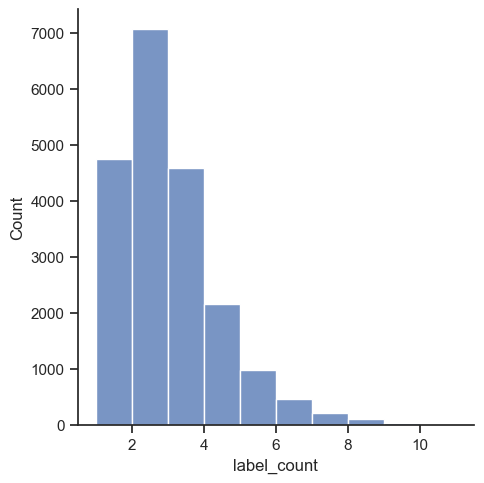

In [7]:
# Using seaborn, create a histogram of the label count of the rows in the DataFrame

# TODO
sns.displot(audio_segments['label_count'], kde=False, bins=10)

Follow the steps below to create a heatmap showing "correlation" between different labels. 
- Specifically, each cell of the heatmap should correspond to the probability that a sample with the corresponding row label also has the corresponding column label. 
- Just consider the labels ["Piano", "Classical music", "Speech", "Conversation", "Screaming"]. 

Your final plot should look something like this:

![alt text](images/heatmap.png "Heatmap")

In [9]:
audio_segments.label_names

0                 Domestic animals, pets|Squeak|Dog|Animal
1                                                   Hammer
2                                                    Cough
3                Music|Speech|Female singing|Child singing
4               Chuckle, chortle|Belly laugh|Baby laughter
                               ...                        
20366    Marimba, xylophone|Glockenspiel|Chime|Mallet p...
20367    Motor vehicle (road)|Accelerating, revving, vr...
20368                                      Chopping (food)
20369                                          Music|Sonar
20370                  Wind|Rustle|Wind noise (microphone)
Name: label_names, Length: 20371, dtype: object

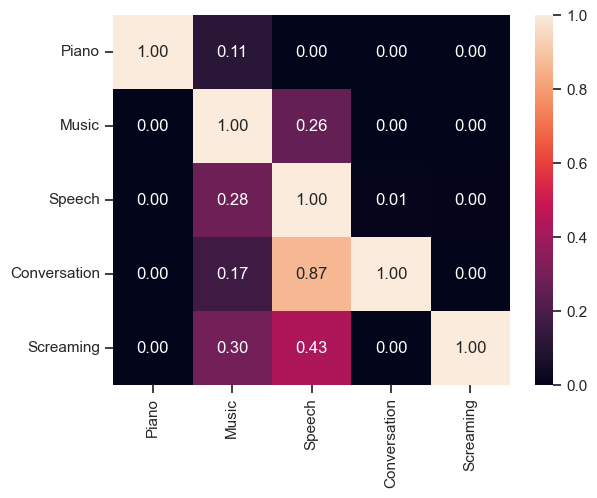

In [16]:
labels = ["Piano", "Music", "Speech", "Conversation", "Screaming"]

# There are a couple ways to approach this, the way we recommend here is to first build a 2D grid where each
# value is the get_joint_proportion value between the corresponding row/column using the functions created in q1.py.

# TODO
proportions = np.ones((5, 5))
for i in range(5):
    for j in range(5):
        proportions[i, j] = get_conditional_proportion(audio_segments.label_names, labels[i], labels[j])

# Then using sns.heatmap, create the heatmap, taking advantage of xticklabels and yticklabels to set the label names
# as tick values

# TODO
ax = sns.heatmap(proportions, xticklabels=labels, yticklabels=labels, annot=True, fmt='.2f')
plt.show()

## Question 2
Question 2 has no notebook component, just fill out the `q2.py` file.

## Question 3

Download the audio for the following labels using the function created in `q3.py`

In [19]:
from q3 import data_pipeline, rename_files, filter_df

In [23]:
# Download "Cough"

# TODO
data_pipeline(csv_path='data/audio_segments_clean.csv',label='Cough')

# Rename to include the start/end times

# TODO

0it [00:00, ?it/s]


In [23]:
# Download "Hammer"

# TODO

# Rename to include the start/end times

# TODO

As you've probably noticed, downloading all this audio data is slow (and as such we only required you to download 2 of the labels). In many cases, it is possible to get significant performance increases by using either multiprocessing (https://docs.python.org/3/library/multiprocessing.html) or multithreading (https://docs.python.org/3/library/threading.html) which could for example allow you to download multiple audio files in parallel. 

As a good rule of thumb, use multithreading when your programs is IO-bound (for example here) and multiprocessing when it is CPU-bound (and thus make use of all the cores of your CPU)

## Question 4
For the following cells, use the ID "0GNNFBrRz1E". Complete the functions and run the cells provided below.

In [24]:
import librosa

In [25]:
# Play the audio segment in Jupyter using 
# https://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.Audio

# TODO

One way to visualize audio is through the use of mel-spectrograms. At a very high level, Mel-spectrograms convert audio to a 2D image through the use of the Fourier transform (more details can be found here: https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53)

In [26]:
stft_hopsize = 128
n_fft = 512
sample_rate = 16000

def to_log_scale(mel: np.ndarray) -> np.ndarray:
    mel = np.log(mel + 1e-6)/2.0
    return mel

def create_mel_spectrogram(mp3_path: str) -> np.ndarray:
    """ 
    THIS FUNCTION IS PROVIDED TO HELP YOU.
    You still need to fill out the function plot_audio() below
    """
    data, sr = librosa.load(mp3_path, dtype='float32')
    librosa_mel = librosa.feature.melspectrogram(y=data, sr=sr, n_fft=512, hop_length=128)
    return to_log_scale(librosa_mel)

create_mel_spectrogram("Hammer_cut/0GNNFBrRz1E_40_50_10.mp3")

Audio data can also be visualized by looking at the waveform (i.e. as a line plot of the amplitude values). We will combine both visualizations methods below. The resulting plot should look something like:
![alt text](images/combined_plot.png "Combined Plot")

In [27]:
def plot_audio(mp3_path: str) -> None:
    """ 
    Using matplotlib and create_mel_spectrogram() write a function that takes a mp3_path and plots
    both the waveform (line plot of amplitudes) and the mel-spectrogram side-by-side as subplots.
    
    Hint: For the lineplot, try to just .plot the data returned by librosa
    """
    # TODO
    

plot_audio("Hammer_cut/0GNNFBrRz1E_40_50_10.mp3")